# **--------------------------Delhivery - Logistics Company-----------------**

*   Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

**The company wants to understand and process the data coming out of data engineering pipelines:**
*   Clean, sanitize and manipulate data to get useful features out of raw fields
*   Make sense out of the raw data and help the data science team to build forecasting models on it.

**Variables considered in tracking Business:**

*   data - tells whether the data is testing or training data
*   trip_creation_time – Timestamp of trip creation
*   route_schedule_uuid – Unique Id for a particular route schedule
*   route_type – Transportation type
    1.   FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way
    2.   Carting: Handling system consisting of small vehicles (carts)
*   trip_uuid - Unique ID given to a particular trip (A trip may include different source and destination centers)
*   source_center - Source ID of trip origin
*   source_name - Source Name of trip origin
*   destination_cente – Destination ID
*   destination_name – Destination Name
*   od_start_time – Trip start time
*   od_end_time – Trip end time
*   start_scan_to_end_scan – Time taken to deliver from source to destination
*   is_cutoff – Unknown field
*   cutoff_factor – Unknown field
*   cutoff_timestamp – Unknown field
*   actual_distance_to_destination – Distance in Kms between source and destination warehouse
*   actual_time – Actual time taken to complete the delivery (Cumulative)
*   osrm_time – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)
*   osrm_distance – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)
*   factor – Unknown field
*   segment_actual_time – This is a segment time. Time taken by the subset of the package delivery
*   segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the package delivery
*   segment_osrm_distance – This is the OSRM distance. Distance covered by subset of the package delivery
*   segment_factor – Unknown field

# **Explorative Data Analysis(EDA)**

*   **Importing necessary packages for EDA**

In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from datetime import datetime as dt
import scipy.stats as stats
from scipy.stats import ttest_ind
warnings.filterwarnings('ignore')

*   **Importing/Reading the dataset for EDA**

In [72]:
d=pd.read_csv("delhivery_data.csv")

In [73]:
d.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


*   **Shape of the dataset**

In [74]:
d.shape

(144867, 24)

1.   The dataset contains 144867 rows ans 24 columns.
2.   The dataset contains 24 features with 144867 data points.

*   **Characteristics of the dataset**

In [75]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

The dataset contains Null or Missing values in 'source_name' and 'destination_name' features.

*   **Dropping features not useful for EDA**

In [76]:
d.drop(['data','is_cutoff','cutoff_factor','cutoff_timestamp','factor','segment_factor'],axis=1,inplace=True)

*   **Statistical Summary of all the numerical features in dataset**

In [77]:
d.describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000
mean,961.262986,234.073372,416.927527,213.868272,284.771297,36.196111,18.507548,22.82902
std,1037.012769,344.990009,598.103621,308.011085,421.119294,53.571158,14.775960,17.86066
min,20.000000,9.000045,9.000000,6.000000,9.008200,-244.000000,0.000000,0.00000
25%,161.000000,23.355874,51.000000,27.000000,29.914700,20.000000,11.000000,12.07010
50%,449.000000,66.126571,132.000000,64.000000,78.525800,29.000000,17.000000,23.51300
75%,1634.000000,286.708875,513.000000,257.000000,343.193250,40.000000,22.000000,27.81325
max,7898.000000,1927.447705,4532.000000,1686.000000,2326.199100,3051.000000,1611.000000,2191.40370


*   **Converting date/time column into pandas date/time**

In [78]:
d['trip_creation_time']=pd.to_datetime(d['trip_creation_time'])
d['od_start_time']=pd.to_datetime(d['od_start_time'])
d['od_end_time']=pd.to_datetime(d['od_end_time'])

*   **Removing Null values**

In [79]:
d.dropna(inplace=True)
d=d.reset_index(drop=True)

* **Merging Rows**  

In [80]:
d['segment_key']=d['trip_uuid']+d['source_center']+d['destination_center']
d['segment_actual_time_sum']=d.groupby('segment_key')['segment_actual_time'].transform('cumsum')
d['segment_osrm_distance_sum']=d.groupby('segment_key')['segment_osrm_distance'].transform('cumsum')
d['segment_osrm_time_sum']=d.groupby('segment_key')['segment_osrm_time'].transform('cumsum')

*   **Grouping data based on the 'segement_key'**

In [81]:
create_segment_dict={
    'trip_creation_time':'first',
    'route_schedule_uuid':'first',
    'route_type':'first',
    'trip_uuid':'first',
    'source_center':'first',
    'source_name':'first',
    'destination_center':'last',
    'destination_name':'last',
    'od_start_time':'min',
    'od_end_time':'max',
    'start_scan_to_end_scan':'first',
    'actual_distance_to_destination':'last',
    'actual_time':'last',
    'osrm_time':'last',
    'osrm_distance':'last',
    'segment_actual_time_sum':'last',
    'segment_osrm_distance_sum':'last',
    'segment_osrm_time_sum':'last'
}

In [82]:
d=d.groupby('segment_key').agg(create_segment_dict).reset_index()
d=d.sort_values(by=['segment_key','od_end_time'])

In [83]:
d.head()

,segment_key,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,trip-153671041653548748IND209304AAAIND000000ACB,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,670.6205,534.0
1,trip-153671041653548748IND462022AAAIND209304AAA,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,649.8528,474.0
2,trip-153671042288605164IND561203AABIND562101AAA,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,28.1995,26.0
3,trip-153671042288605164IND572101AAAIND561203AAB,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,55.9899,39.0
4,trip-153671043369099517IND000000ACBIND160002AAC,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,317.7408,231.0


*   **Total Time taken by an order**

In [84]:
d['od_time_diff_hour']=(d['od_end_time']-d['od_start_time']).dt.total_seconds()/60

  *   **Grouping data futher based on 'trip_uuid'**

In [85]:
create_trip_dict={
    'trip_creation_time':'first',
    'route_schedule_uuid':'first',
    'route_type':'first',
    'trip_uuid':'first',
    'source_center':'last',
    'source_name':'last',
    'destination_center':'first',
    'destination_name':'first',
    'od_start_time':'min',
    'od_end_time':'max',
    'od_time_diff_hour':'sum',
    'start_scan_to_end_scan':'sum',
    'actual_distance_to_destination':'sum',
    'actual_time':'sum',
    'osrm_time':'sum',
    'osrm_distance':'sum',
    'segment_actual_time_sum':'sum',
    'segment_osrm_distance_sum':'sum',
    'segment_osrm_time_sum':'sum'
}

In [86]:
d=d.groupby('trip_uuid').agg(create_trip_dict).reset_index(drop=True)
d_m=d.groupby('trip_uuid').agg(create_trip_dict).reset_index(drop=True)

*   After merging the rows there are only 14787 entries in dataset.

*   **Outlier Detection**

In [87]:
numericals=['start_scan_to_end_scan','actual_distance_to_destination','actual_time','osrm_time','osrm_distance','segment_actual_time_sum','segment_osrm_distance_sum','segment_osrm_time_sum','od_time_diff_hour']

*   **Box - Plots**

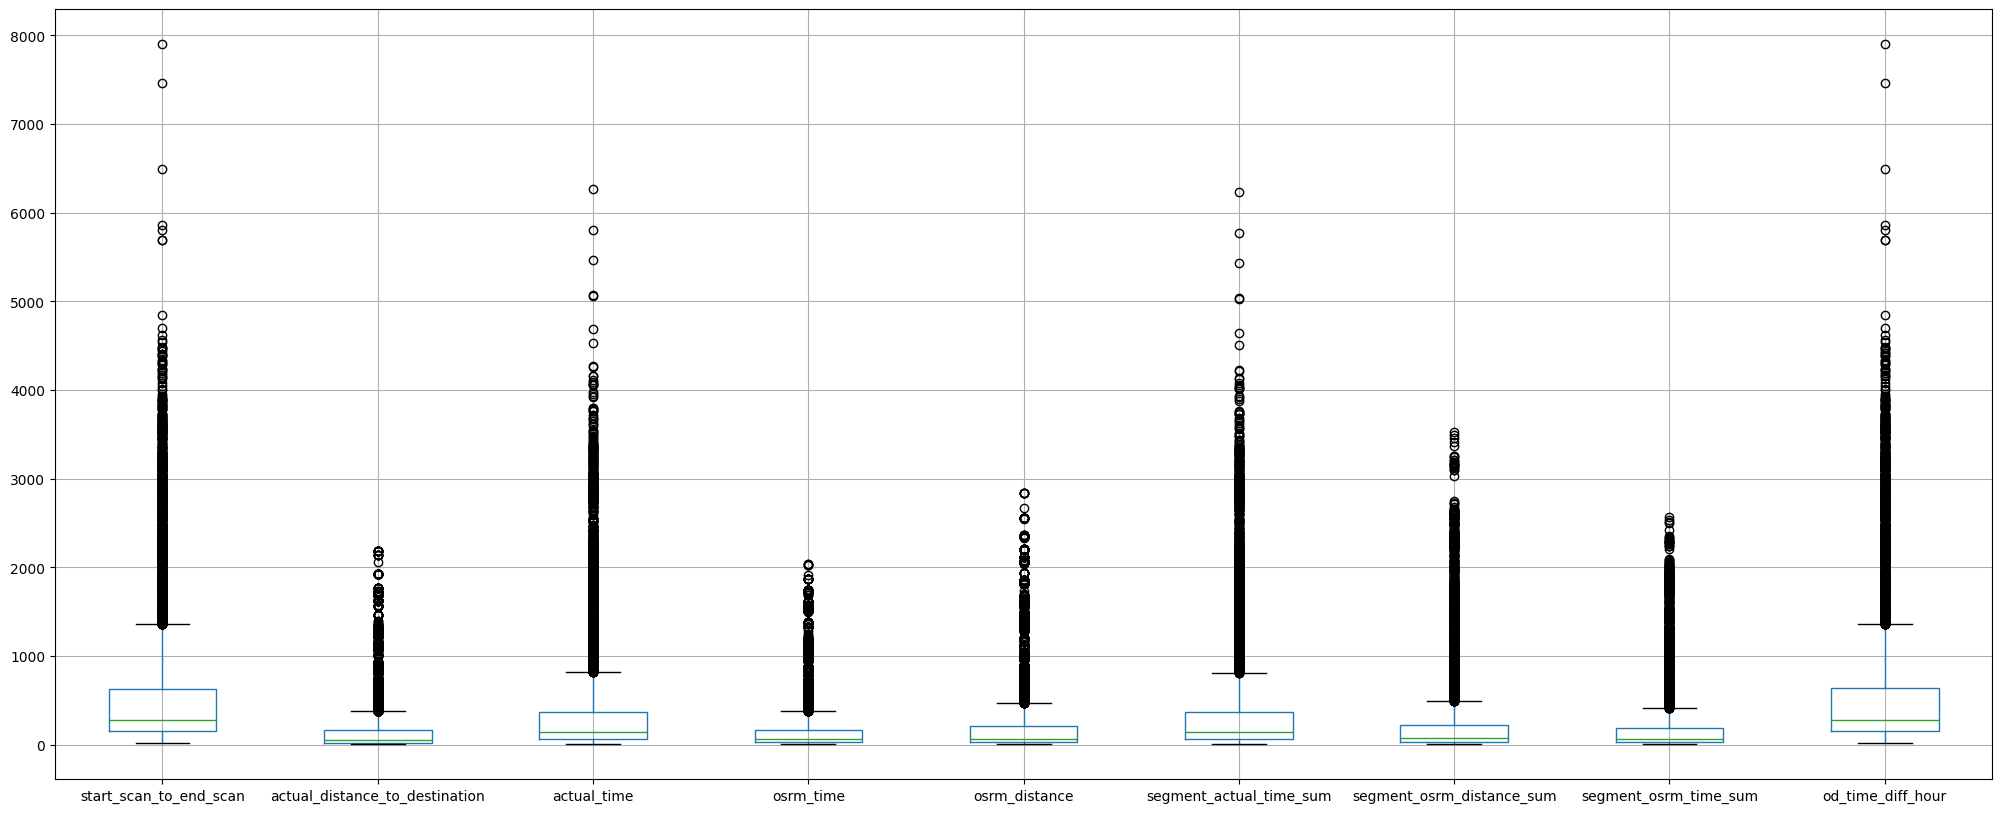

In [88]:
d[numericals].boxplot(figsize=(25,10))
plt.show()

In [89]:
# finding the 1st Quartile
Q1 = np.quantile(d[numericals], 0.25)

# finding the 3rd Quartile
Q3 = np.quantile(d[numericals], 0.75)

# finding the Inter-Quartile-Range(IQR) region
IQR = Q3-Q1

# finding upper and lower whiskers
upper_bound = Q3+(1.5*IQR)
lower_bound = Q1-(1.5*IQR)

*   **Outlier Treatment**

In [90]:
d=d[~((d[numericals] < (lower_bound)) |(d[numericals] > (upper_bound))).any(axis=1)]
d=d.reset_index(drop=True)



*   After removing outlier's 11359 entries are available in dataset.

*   **Extracting City,Place,Code,State from Source & Destination Names**

In [91]:
def state(x):
  state=x.split('(')[1]
  return state[:-1]

def city(x):
  city=(x.split('(')[0]).split('_')[0]
  return city

def place(x):
  x=x.split('(')[0]
  if len(x.split('_'))>=3:
    place=x.split('_')[1]
  elif len(x.split('_'))==2:
    place=x.split('_')[0]
  else:
    place=x.split(" ")[0]
  return place

def code(x):
  x=x.split('(')[0]
  if len(x.split('_'))>=3:
    return x.split('_')[-1]
  return  "none"

In [92]:
d['source_state']=d['source_name'].apply(state)
d['source_city']=d['source_name'].apply(city)
d['source_place']=d['source_name'].apply(place)
d['source_code']=d['source_name'].apply(code)

d['destination_state']=d['destination_name'].apply(state)
d['destination_city']=d['destination_name'].apply(city)
d['destination_place']=d['destination_name'].apply(place)
d['destination_code']=d['destination_name'].apply(code)

*   **Business Insights**

*   State with most number of orders

In [93]:
(d['source_state'].value_counts()).head()

,count
source_state,
Maharashtra,2215
Karnataka,1869
Haryana,1207
Tamil Nadu,985
Delhi,634


*   Maharashtra is the source state with more number of orders.

In [94]:
(d['destination_state'].value_counts()).head()

,count
destination_state,
Maharashtra,2194
Karnataka,1870
Haryana,1256
Tamil Nadu,975
Gujarat,636


*   Maharashtra is the destination state with more number of orders.

In [95]:
(d[(d['source_state']=="Maharashtra") & (d['destination_state']=="Maharashtra")]['source_city'].value_counts()).head()

,count
source_city,
Bhiwandi,579
Mumbai,566
Pune,322
Mumbai Hub,300
LowerParel,65


*   Bhiwandi city is the source for the most of the orders.

In [96]:
(d[(d['source_state']=="Maharashtra") & (d['destination_state']=="Maharashtra") & (d['source_city']=="Bhiwandi")]["destination_city"].value_counts()).head()

,count
destination_city,
Mumbai,330
Mumbai Hub,105
Bhiwandi,79
Pune,61
Murbad,2


*   Mumbai city is the destination for the most of the orders.

**Average distance & time taken b/w Mumbai - Bhiwandi Corridor**

In [97]:
d[((d['source_city']=="Bhiwandi") & (d['destination_city']=="Mumbai")) | ((d['source_city']=="Mumbai") & (d['destination_city']=="Bhiwandi"))]['actual_distance_to_destination'].mean()

22.48440707665221

In [98]:
d[((d['source_city']=="Bhiwandi") & (d['destination_city']=="Mumbai")) | ((d['source_city']=="Mumbai") & (d['destination_city']=="Bhiwandi"))]['actual_time'].mean()

84.6852886405959

*   **Extracting Month,Year,Day from Trip_Creation_Time**

In [99]:
d['trip_creation_day']=d['trip_creation_time'].dt.day
d['trip_creation_month']=d['trip_creation_time'].dt.month
d['trip_creation_year']=d['trip_creation_time'].dt.year



*   **One - Hot Encoding**



In [100]:
d['route_type'].value_counts()

,count
route_type,
Carting,8509
FTL,2850


In [101]:
d['route_type']=d['route_type'].map({'FTL':0,'Carting':1})



*   **Normalizing/Standardizing the numerical features**

In [102]:
from sklearn.preprocessing import StandardScaler

In [103]:
scaler=StandardScaler()
scaler.fit(d[numericals])
d[numericals]=scaler.transform(d[numericals])

In [104]:
d[numericals]

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour
0,-0.448285,0.254553,-0.002699,0.057773,0.152390,-0.007499,0.050711,-0.101539,-0.442164
1,-0.957534,-0.725899,-0.726969,-0.861111,-0.774690,-0.720200,-0.788021,-0.843649,-0.957706
2,-0.390994,-0.595985,-0.709725,-0.722412,-0.655889,-0.711509,-0.681236,-0.737633,-0.385753
3,-0.970266,-0.867243,-1.028748,-0.895786,-0.883246,-1.024402,-0.890503,-0.889084,-0.973527
4,-0.664716,-0.634019,-0.683858,-0.531700,-0.643766,-0.676743,-0.670078,-0.571037,-0.663169
...,...,...,...,...,...,...,...,...,...
11354,0.041868,-0.015445,-0.520035,-0.046252,-0.012648,-0.520296,-0.201436,-0.146974,0.043507
11355,-1.212159,-0.754982,-1.054615,-0.913123,-0.825582,-1.050476,-0.837426,-0.919375,-1.211320
11356,1.085830,-0.349386,1.195795,-0.288976,-0.218936,1.209307,0.320633,0.246799,1.086394
11357,0.614774,1.331721,1.040594,1.982227,1.370899,1.009403,1.867946,2.261099,0.618582


#    **Hypothesis - Testing**

*   H0 - NULL Hypothesis
*   Ha - Alternate Hypothesis
*   Significance level(alpha) = 5% (or) 0.05

In [105]:
aggregated_actual_time = d_m['actual_time']
aggregated_osrm_time = d_m['osrm_time']
aggregated_osrm_distance=d_m['osrm_distance']
aggregated_segment_actual_time=d_m['segment_actual_time_sum']
aggregated_segment_osrm_time=d_m['segment_osrm_time_sum']
aggregated_segment_osrm_distance=d_m['segment_osrm_distance_sum']

*   **Checking, If there is difference between aggregated actual_time and aggregated osrm_time.**

**Tests to know if the samples follow normal distribution**

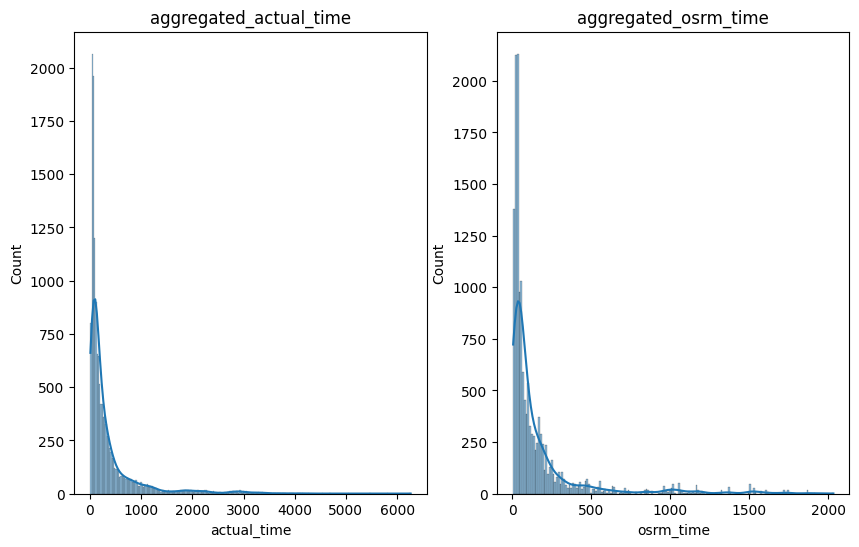

In [106]:
plt.figure(figsize=(10,6))
plt.subplot(121)
sns.histplot(aggregated_actual_time,kde=True)
plt.title("aggregated_actual_time")
plt.subplot(122)
sns.histplot(aggregated_osrm_time,kde=True)
plt.title("aggregated_osrm_time")
plt.show()

**QQ Plot**

[]

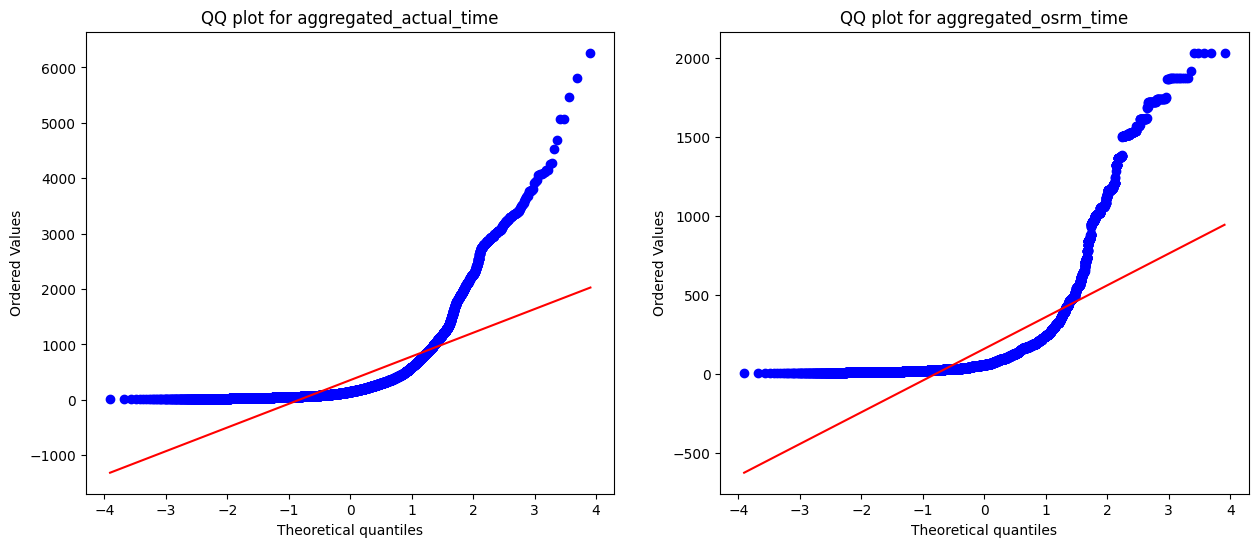

In [107]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
stats.probplot(aggregated_actual_time, plot = plt, dist = 'norm')
plt.title('QQ plot for aggregated_actual_time')
plt.subplot(1, 2, 2)
stats.probplot(aggregated_osrm_time, plot = plt, dist = 'norm')
plt.title('QQ plot for aggregated_osrm_time')
plt.plot()

**From the graph's the samples don't follow normal distribution.**

**Shapiro-Wilk Test**

*   H0 - Both aggregated actual_time and aggregated osrm_time follow normal distribution.
*   Ha - Both aggregated actual_time and aggregated osrm_time does not follow normal distribution.

In [108]:
test_stat, p_value = stats.shapiro(aggregated_actual_time.sample(5000))
print('p-value', p_value)

p-value 1.6553286534448162e-76


In [109]:
if p_value < 0.05:
  print("The sample does not follow normal distribution")
else:
  print("The sample follows normal distribution'")

The sample does not follow normal distribution


In [110]:
test_stat, p_value = stats.shapiro(aggregated_osrm_time.sample(5000))
print('p-value', p_value)

p-value 5.332961677758037e-78


In [111]:
if p_value < 0.05:
  print("The sample does not follow normal distribution")
else:
  print("The sample follows normal distribution'")

The sample does not follow normal distribution


**Lavene's Test**

*   H0 - Both aggregated actual_time and aggregated osrm_time have homogeneous variance.
*   Ha - Both aggregated actual_time and aggregated osrm_time have non-homogeneous variance.

In [112]:
test_stat, p_value = stats.levene(aggregated_actual_time, aggregated_osrm_time)
print('p-value', p_value)

p-value 8.743536461316657e-219


In [113]:
if p_value < 0.05:
  print('The samples do not have Homogenous Variance')
else:
  print('The samples have Homogenous Variance ')

The samples do not have Homogenous Variance


**Since the samples do not follow any of the assumptions T-Test cannot be applied here, we can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.**

In [114]:
test_stat, p_value = stats.mannwhitneyu(aggregated_actual_time, aggregated_osrm_time)
print('p-value', p_value)

p-value 0.0


In [115]:
if p_value < 0.05:
  print('The samples are not similar')
else:
  print('The samples are similar')

The samples are not similar


Therefore,there is difference b/w aggregated actual_time and aggregated osrm_time.

*   **Checking, If there is difference between aggregated actual_time and aggregated segment actual time.**


**Tests to know if the samples follow normal distribution**

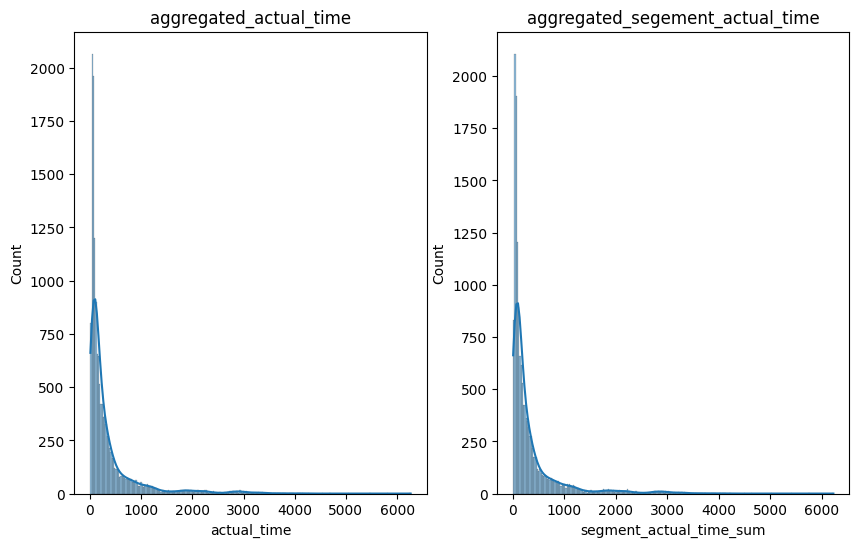

In [116]:
plt.figure(figsize=(10,6))
plt.subplot(121)
sns.histplot(aggregated_actual_time,kde=True)
plt.title("aggregated_actual_time")
plt.subplot(122)
sns.histplot(aggregated_segment_actual_time,kde=True)
plt.title("aggregated_segement_actual_time")
plt.show()

*   **QQ Plot**

[]

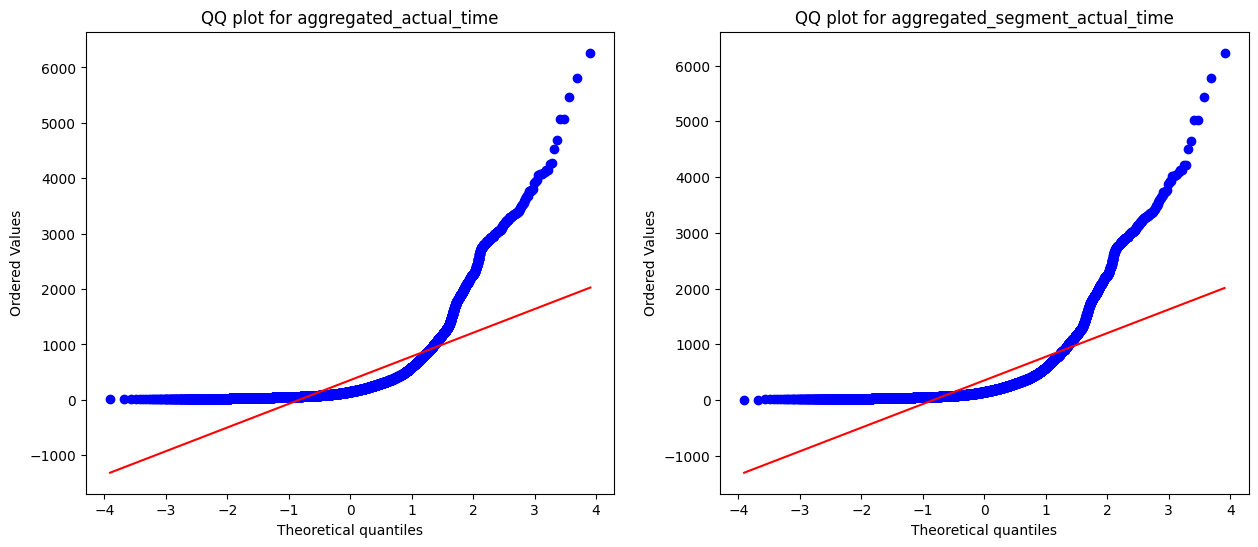

In [117]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
stats.probplot(aggregated_actual_time, plot = plt, dist = 'norm')
plt.title('QQ plot for aggregated_actual_time')
plt.subplot(1, 2, 2)
stats.probplot(aggregated_segment_actual_time, plot = plt, dist = 'norm')
plt.title('QQ plot for aggregated_segment_actual_time')
plt.plot()

**From the graph's the samples don't follow normal distribution.**

**Shapiro-Wilk Test**

*   H0 - Both aggregated actual_time and aggregated segment actual time follow normal distribution.
*   Ha - Both aggregated actual_time and aggregated segment actual time does not follow normal distribution.

In [118]:
test_stat, p_value = stats.shapiro(aggregated_actual_time.sample(5000))
print('p-value', p_value)

p-value 1.304928504555277e-75


In [119]:
if p_value < 0.05:
  print("The sample does not follow normal distribution")
else:
  print("The sample follows normal distribution'")

The sample does not follow normal distribution


In [120]:
test_stat, p_value = stats.shapiro(aggregated_segment_actual_time.sample(5000))
print('p-value', p_value)

p-value 1.2069259525332788e-76


In [121]:
if p_value < 0.05:
  print("The sample does not follow normal distribution")
else:
  print("The sample follows normal distribution'")

The sample does not follow normal distribution


**Lavene's Test**

*   H0 - Both aggregated actual_time and aggregated_segment_actual_time have homogeneous variance.
*   Ha - Both aggregated actual_time and aggregated_segment_actual_time have non-homogeneous variance.

In [122]:
test_stat, p_value = stats.levene(aggregated_actual_time, aggregated_segment_actual_time)
print('p-value', p_value)

p-value 0.6962681452003544


In [123]:
if p_value < 0.05:
  print('The samples do not have Homogenous Variance')
else:
  print('The samples have Homogenous Variance ')

The samples have Homogenous Variance 


**Since the samples do not follow any of the assumptions T-Test cannot be applied here, we can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.**

In [124]:
test_stat, p_value = stats.mannwhitneyu(aggregated_actual_time, aggregated_segment_actual_time)
print('p-value', p_value)

p-value 0.41578601931625214


In [125]:
if p_value < 0.05:
  print('The samples are not similar')
else:
  print('The samples are similar ')

The samples are similar 


Therefore,there is no difference b/w aggregated actual_time and aggregated segment actual time.

*   **Checking, If there is difference between aggregated OSRM distance and aggregated segment OSRM distance.**

**Tests to know if the samples follow normal distribution**

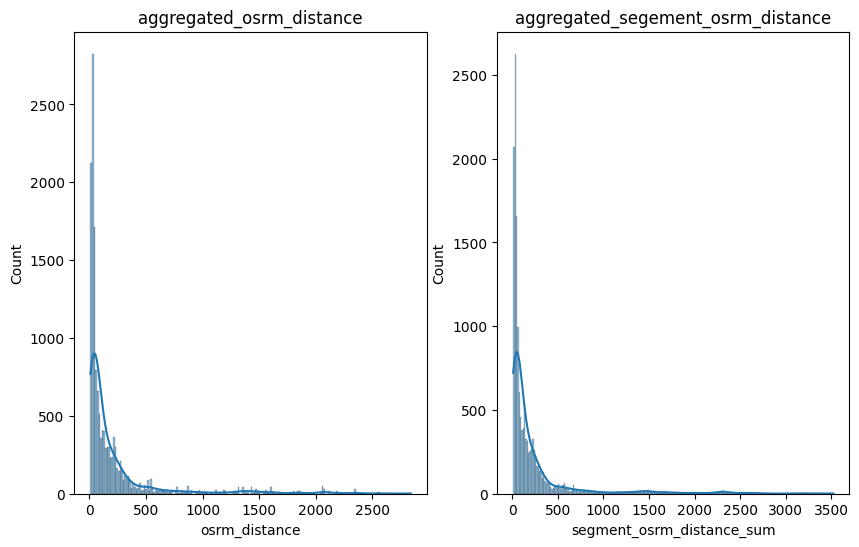

In [126]:
plt.figure(figsize=(10,6))
plt.subplot(121)
sns.histplot(aggregated_osrm_distance,kde=True)
plt.title("aggregated_osrm_distance")
plt.subplot(122)
sns.histplot(aggregated_segment_osrm_distance,kde=True)
plt.title("aggregated_segement_osrm_distance")
plt.show()

**QQ Plot**

[]

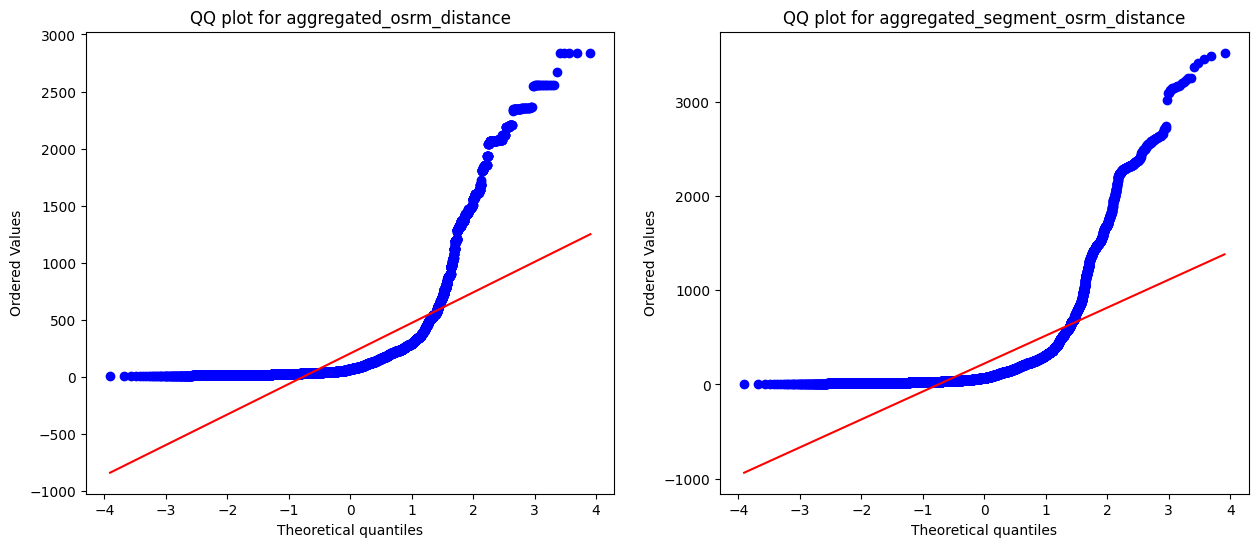

In [127]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
stats.probplot(aggregated_osrm_distance, plot = plt, dist = 'norm')
plt.title('QQ plot for aggregated_osrm_distance')
plt.subplot(1, 2, 2)
stats.probplot(aggregated_segment_osrm_distance, plot = plt, dist = 'norm')
plt.title('QQ plot for aggregated_segment_osrm_distance')
plt.plot()

**From the graph's the samples don't follow normal distribution.**

**Shapiro-Wilk Test**

*   H0 - Both aggregated osrm distance and aggregated segment osrm distance follow normal distribution.
*   Ha - Both aggregated osrm distance and aggregated segment osrm distance does not follow normal distribution.

In [128]:
test_stat, p_value = stats.shapiro(aggregated_osrm_distance.sample(5000))
print('p-value', p_value)

p-value 5.456471307799816e-79


In [129]:
if p_value < 0.05:
  print("The sample does not follow normal distribution")
else:
  print("The sample follows normal distribution'")

The sample does not follow normal distribution


In [130]:
test_stat, p_value = stats.shapiro(aggregated_segment_osrm_distance.sample(5000))
print('p-value', p_value)

p-value 6.3111999962921364e-80


In [131]:
if p_value < 0.05:
  print("The sample does not follow normal distribution")
else:
  print("The sample follows normal distribution'")

The sample does not follow normal distribution


**Lavene's Test**

*   H0 - Both aggregated_osrm_distance and aggregated_segment_osrm_distance have homogeneous variance.
*   Ha - Both aggregated_osrm_distance and aggregated_segment_osrm_distance have non-homogeneous variance.

In [132]:
test_stat, p_value = stats.levene(aggregated_osrm_distance, aggregated_segment_osrm_distance)
print('p-value', p_value)

p-value 0.00022171213513990103


In [133]:
if p_value < 0.05:
  print('The samples do not have Homogenous Variance')
else:
  print('The samples have Homogenous Variance ')

The samples do not have Homogenous Variance


**Since the samples do not follow any of the assumptions T-Test cannot be applied here, we can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.**

In [134]:
test_stat, p_value = stats.mannwhitneyu(aggregated_osrm_distance, aggregated_segment_osrm_distance)
print('p-value', p_value)

p-value 1.0001087659092072e-06


In [135]:
if p_value < 0.05:
  print('The samples are not similar')
else:
  print('The samples are similar ')

The samples are not similar


Therefore,there is difference b/w aggregated osrm distance and aggregated segment osrm distance.

*   **Checking, If there is difference between mean's of aggregated OSRM time and aggregated segment OSRM time.**

**Tests to know if the samples follow normal distribution**

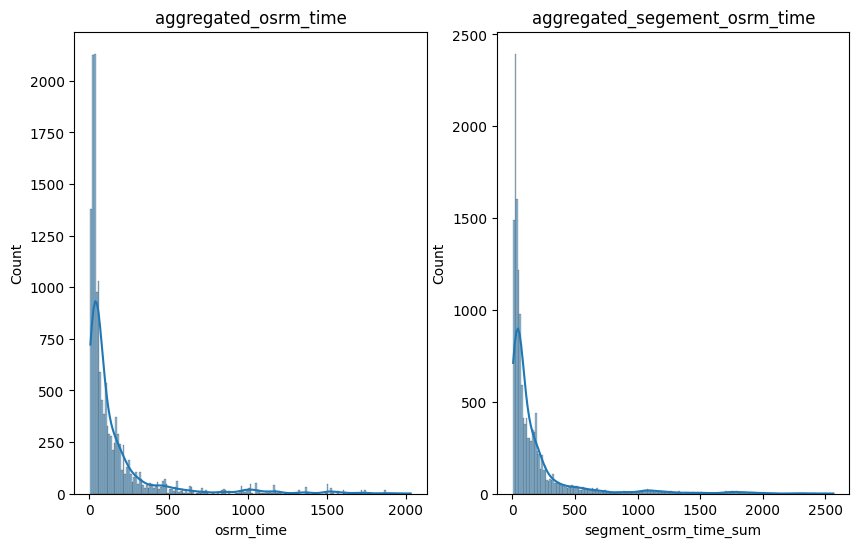

In [136]:
plt.figure(figsize=(10,6))
plt.subplot(121)
sns.histplot(aggregated_osrm_time,kde=True)
plt.title("aggregated_osrm_time")
plt.subplot(122)
sns.histplot(aggregated_segment_osrm_time,kde=True)
plt.title("aggregated_segement_osrm_time")
plt.show()

**QQ Plot**

[]

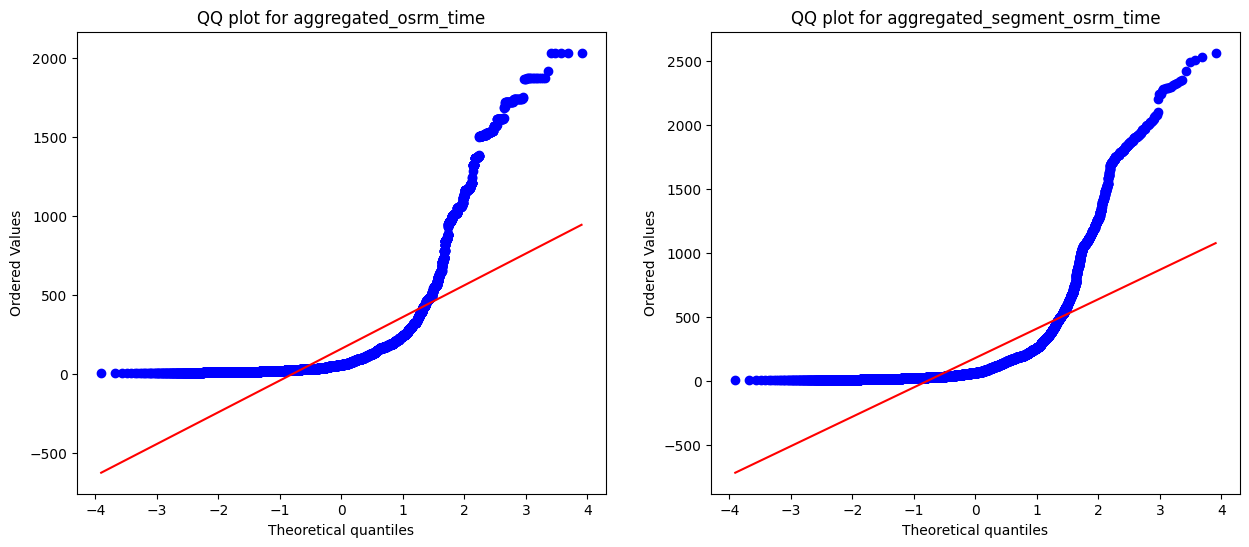

In [137]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
stats.probplot(aggregated_osrm_time, plot = plt, dist = 'norm')
plt.title('QQ plot for aggregated_osrm_time')
plt.subplot(1, 2, 2)
stats.probplot(aggregated_segment_osrm_time, plot = plt, dist = 'norm')
plt.title('QQ plot for aggregated_segment_osrm_time')
plt.plot()

**From the graph's the samples don't follow normal distribution.**

**Shapiro-Wilk Test**

*   H0 - Both aggregated osrm time and aggregated segment osrm time follow normal distribution.
*   Ha - Both aggregated osrm time and aggregated segment osrm time does not follow normal distribution.

In [138]:
test_stat, p_value = stats.shapiro(aggregated_osrm_time.sample(5000))
print('p-value', p_value)

p-value 1.5168534071363453e-77


In [139]:
if p_value < 0.05:
  print("The sample does not follow normal distribution")
else:
  print("The sample follows normal distribution'")

The sample does not follow normal distribution


In [140]:
test_stat, p_value = stats.shapiro(aggregated_segment_osrm_time.sample(5000))
print('p-value', p_value)

p-value 5.106014640979034e-79


In [141]:
if p_value < 0.05:
  print("The sample does not follow normal distribution")
else:
  print("The sample follows normal distribution'")

The sample does not follow normal distribution


**Lavene's Test**

*   H0 - Both aggregated_osrm_time and aggregated_segment_osrm_time have homogeneous variance.
*   Ha - Both aggregated_osrm_time and aggregated_segment_osrm_time have non-homogeneous variance.

In [142]:
test_stat, p_value = stats.levene(aggregated_osrm_time, aggregated_segment_osrm_time)
print('p-value', p_value)

p-value 9.250556006347759e-08


In [143]:
if p_value < 0.05:
  print('The samples do not have Homogenous Variance')
else:
  print('The samples have Homogenous Variance ')

The samples do not have Homogenous Variance


**Since the samples do not follow any of the assumptions T-Test cannot be applied here, we can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.**

In [144]:
test_stat, p_value = stats.mannwhitneyu(aggregated_osrm_distance, aggregated_segment_osrm_distance)
print('p-value', p_value)

p-value 1.0001087659092072e-06


In [145]:
if p_value < 0.05:
  print('The samples are not similar')
else:
  print('The samples are similar ')

The samples are not similar


Therefore,there is difference b/w aggregated osrm time and aggregated segment osrm time.

*    **Recommendations**

1.   Maharashtra state has more number of order deliveries within the state.
   So,delhivery has to focus on logistics and mobility of orders in mumbai.
2.   Mumbai - Bhiwandi corridor in maharashtra is the busiest corridor for the delhivery business.
The average distance is 22.48 units to travel through the corridor.
The average time is 84.68 units time taken to travel through the corridor.